## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import re
from sklearn.model_selection import train_test_split

In [ ]:
FA = "2"

DATA_PATH = ""
TRAIN_PATH = ""
TEST_PATH = ""

SEED = 312
N_TEST = 50

## Data

In [ ]:
df = pd.read_csv(DATA_PATH)

assert not df.isnull().values.any()
assert df['student'].dtype == 'object'
assert df['student'].apply(lambda x: bool(re.fullmatch(r'XYZ25\d{3}', str(x)))).all()
assert df['response'].dtype == 'object'
assert df['score'].dtype == int

df.head()

<Axes: ylabel='Frequency'>

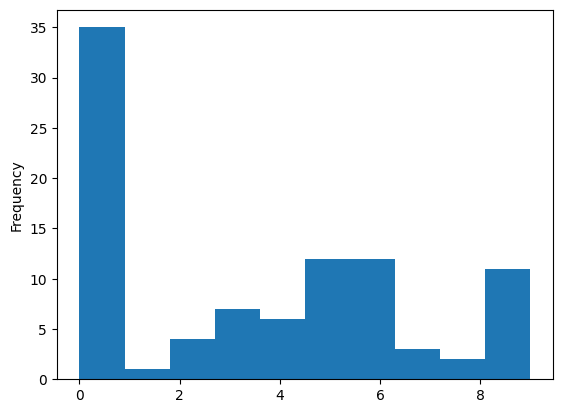

In [5]:
df['score'].plot.hist(bins=10)

## Split

In [6]:
df_filtered = df[df["score"].map(df["score"].value_counts()) >= 2]
df_rare = df[df["score"].map(df["score"].value_counts()) < 2]

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df_filtered,
    test_size=N_TEST,
    stratify=df_filtered["score"],
    random_state=SEED
)
df_test = pd.concat([df_test, df_rare], ignore_index=True)

In [8]:
# To account for error straifying a dataset with a single-instance class
score_0_sample = df_test[df_test["score"] == 0].sample(n=1, random_state=SEED)
df_test = df_test.drop(score_0_sample.index)
df_train = pd.concat([df_train, score_0_sample], ignore_index=True)

assert sorted(list(df_train["student"])+list(df_test["student"])) == sorted(list(df["student"]))

## Save

In [9]:
df_train.to_csv(TRAIN_PATH, index=False)
df_test.to_csv(TEST_PATH, index=False)